# 1. import library

In [ ]:
# 1. numpy
import numpy as np

# 2. pytorch
import torch
import torch.nn as nn
import torch.optim as optim # gradient descent method를 구현
import torchvision.datasets as dset # pytorch에서 제공하는 dataset --> MNIST
import torchvision.transforms as transforms # data를 훈련하기 위해서 관리하는 lib
from torch.utils.data import DataLoader # data를 읽어들이는 lib
from torch.autograd import Variable # numpy의 배열을 pytorch의 변수로 변환 --> 자동 미분하려고

# 3. matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# 2. 모델 설계 (MLP)

In [ ]:
# n_input : 28x28 = 784
# 1st hidden : 256
# 2nd hidden : 128
# n_output : 10
model = nn.Sequential (
    nn.Linear (784,256), # input --> 1st hidden
    nn.Sigmoid () ,
    nn.Linear (256,128), # 1st hidden --> 2nd hidden
    nn.Linear(128,10) # 2nd hidden --> output
)

# 3. 데이터 로딩 (MNIST)

In [ ]:
# MNIST dataset = train set + test set
mnist_train = dset.MNIST("" , train=True , transform=transforms.ToTensor(),
                         target_transform=None , download=True)
mnist_test = dset.MNIST("" , train=False , transform=transforms.ToTensor(),
                        target_transform=None , download=True)

## 3.1 data 확인

mnist_train의 길이: 60000
mnist_test의 길이: 10000
image의 크기: torch.Size([1, 28, 28])
label의 크기: 0
torch.FloatTensor


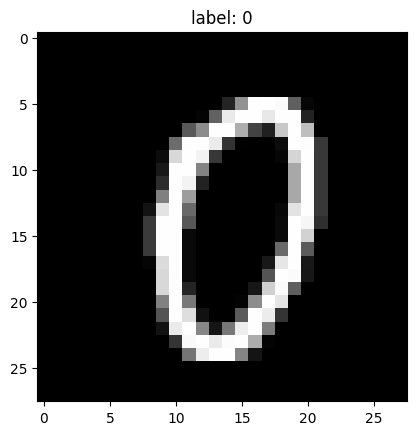

In [ ]:
# download 받은 data의 크기는 ?
print("mnist_train의 길이:" , len(mnist_train))
print("mnist_test의 길이:" , len(mnist_test))

# 하나의 데이터는 어떤 모양 ?
image , label = mnist_train.__getitem__(1000)
print("image의 크기:" , image.size()) # tensor로 받았으니까 28x28
print("label의 크기:" , label)

# image를 그려보기 --> 그리기는 matplotlib의 입력은 numpy array
img = image.numpy () # pytorch의 Tensor를 numpy의 ndarray로 변환
print(image.type())
plt.title("label: %d" %label)
plt.imshow(img[0] , cmap='gray')
plt.show()

# 4. 초기 설정

## 4.1 hyperparameter 설정

In [10]:
# batch_size : 한 번에 훈련할 데이터의 양 (하나씩 훈련하면 lopp 너무많이 돔)
batch_size = 1024

# learning_rate
learning_rate = 0.00001

#epoch
num_epoch = 500

## 4.2 dataloader 설정

In [12]:
train_loader =  torch.utils.data.DataLoader (mnist_train,
                                             batch_size=batch_size,
                                             shuffle=True,
                                             num_workers=2,
                                             drop_last=True)

test_loader = torch.utils.data.DataLoader (mnist_test,
                                           batch_size=batch_size,
                                           shuffle=False,
                                           num_workers=2,
                                           drop_last=True)

## 4.3 loss 함수와 optimizer를 설정

In [29]:
# loss를 criterion 이라고 많이 함
criterion = nn.CrossEntropyLoss ()
optimizer = optim.SGD(model.parameters() , lr=learning_rate)

# 5. 훈련

## 5.1 Accuracy 측정 함수 정의

In [24]:
# accuracy = 맞는 답의 수 / 전체 답의 수
def ComputeAccuracy (dloader , imodel):
    # 전체 답의 수 , 맞는 답의 수
    total = 0
    correct = 0

    # dataloader를 이용해서 data를 불러오는 과정을 수행
    for j , [imgs , labels] in enumerate(dloader): # batch_size개 만큼의 [img,label]을 읽어 옴
        img = imgs
        label = Variable(labels)
        img = Variable(img , requires_grad=False)
        # img data는 1024 x 1 x 28 x 28
        # model의 입력은 1024 x 28 x 28  => mat 사이즈가 안 맞아 -> 1024 x 784 (28x28)
        img = img.reshape((img.shape[0] , img.shape[2] , img.shape[3]))
#        print(img.shape())
        img = img.reshape((img.shape[0] , img.shape[1]*img.shape[2]))
#        print(img.shape())

        # 출력 생성
        output = imodel (img) # output : 10개의 확률, i번째 확률은 label이 i일 확률 --> argmax
        _,output_index = torch.max(output,1)
        total += label.size(0)
        correct += (output_index == label).sum().float()

    print("Accuracy: {}".format(correct/total*100))



In [26]:
ComputeAccuracy(test_loader , model)

Accuracy: 11.360677719116211


# 6. 실행 , 테스트

In [ ]:
loss_arr = []
for i in range(num_epoch):
    for j,[imgs , labels] in enumerate(train_loader):
        img = imgs
        label = Variable(labels)
        # imgs를 var 안 한 이유는 형태가 안 맞기 때문이다

        # 1024 x 1 x 28 x 28 --> 1024 x 28 x28
        img = img.reshape((img.shape[0] , img.shape[2] , img.shape[3]))
        # 1024 x 28 x 28 --> 1024 x 784
        img = img.reshape((img.shape[0] , img.shape[1]*img.shape[2]))
        img = Variable (img ,requires_grad = True)

        optimizer.zero_grad ()
        output = model(img)
        loss = criterion ( output , label)
        loss_arr.append(loss)

        loss.backward ()
        optimizer.step()
    if (i%10 == 0)
        print("%d.." %i)
        ComputeAccuracy(test_loader , model)
        print(loss)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
